<a href="https://colab.research.google.com/github/MithunSR/Time_series_tutorials/blob/main/Time_Series_Analysis_and_Forecasting_using_Auto_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Analysis and Forecasting using Auto Time Series

A time series is a sequence of data points that occur in successive order over time. It shows all the data set variables that change over time.

Time series analysis extracts meaningful patterns and attributes from the historical data. It enables the model to gain knowledge and identify trends in the dataset.

Time series builds a model that predicts future values based on historical data. The model can forecast forex exchange rates, stock prices, weather, and Covid-19 caseload. In stock prediction, a time series model tracks the movement of stock prices, such as Apple stock. Accurate predictions of the model will yield profit to the investors.

In this tutorial, we will build an electricity consumption prediction model. We will use Auto Time Series library (Auto-TS) to train the model.

**There are different types of time series models. The most common models that Auto Time Series runs are as follows:**

PyFlux Model.
Non-Seasonal ARIMA Model.
Seasonal SARIMAX Model.
Basic Machine Learning Model.
Vector Autoregressive Model.
Facebook Prophet Model.
All the listed models above support time series analysis and forecasting. Auto-TS chooses the best model based on its accuracy score and predictions made. We will then plot a line graph to show the forecast values.

**Benefits of using Auto Time Series library**

It performs automated dataset preprocessing. It will automatically transform the input dataset into a format the model can use. It removes noise and unnecessary information in the dataset.

It can handle missing values and outliers. Auto-TS handles the missing values to ensure we have a complete dataset. It also removes outliers that are not within the dataset range.

It trains high-accuracy models. Auto-TS produces reliable and accurate models.

It selects the optimal time series model. Auto-TS automatically runs multiple time series models listed above. It then automatically selects the optimal model. This model will give the most accurate results.

Automatic hyperparameter tuning and configurations. Auto-TS automatically fine-tunes the model parameters. It ensures the model gives the best accuracy score.

##Installing Auto Time Series library

In [166]:
!pip install auto_ts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [167]:
import auto_ts as AT

##Python function to convert the Bill_Date column to the DateTime format.

In [168]:
from datetime import datetime

In [169]:
def parse(x):
    return datetime.strptime(x, '%m/%d/%Y')

##Loading the dataset

In [170]:
import pandas as pd

In [171]:
df = pd.read_csv('/content/electricity_consumption.csv', parse_dates = ['Bill_Date'], date_parser=parse)

In [172]:
df

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.00,247.73,31
1,2016-02-01,292,1138.8,175.20,234.11,31
2,2016-03-01,130,507.0,78.00,123.85,29
3,2016-04-01,117,456.3,70.20,111.22,29
4,2016-05-01,136,530.4,81.60,118.37,29
5,2016-06-01,63,245.7,37.80,77.81,32
6,2016-07-01,110,429.0,66.00,86.67,30
7,2016-08-01,176,686.4,105.60,122.40,29
8,2016-09-01,357,1392.3,214.20,223.62,33
9,2016-10-01,235,916.5,141.00,152.54,29


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Bill_Date      53 non-null     datetime64[ns]
 1   On_peak        53 non-null     int64         
 2   Off_peak       53 non-null     float64       
 3   Usage_charge   53 non-null     float64       
 4   Billed_amount  53 non-null     float64       
 5   Billing_days   53 non-null     int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.6 KB


In [174]:
ec_df = df.set_index('Bill_Date')

In [175]:
ec_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


**Selecting the dependent variable**

The dependent variable is the variable that the model will predict. This variable changes with time. The dependent variable is the Billed_amount.

In [176]:
ec_data = ec_df['Billed_amount']

In [177]:
import matplotlib.pyplot as plt

<Axes: xlabel='Bill_Date'>

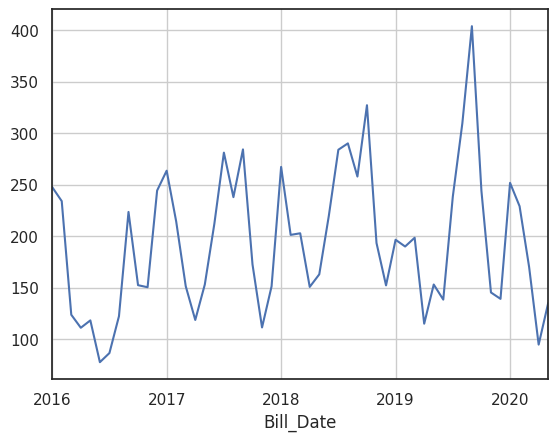

In [178]:
ec_data.plot(grid=True)

<Axes: xlabel='Bill_Date'>

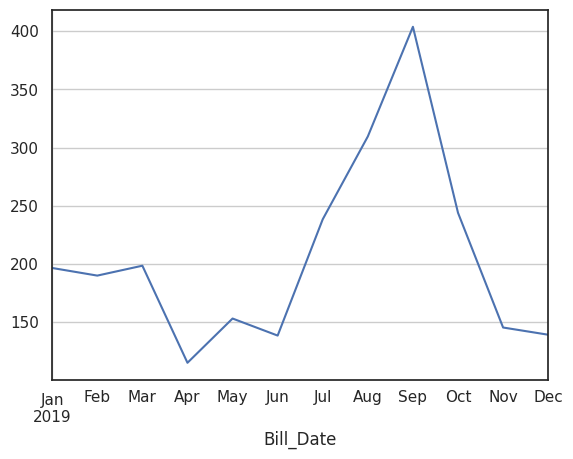

In [179]:
ec_df_2019=ec_df.loc['2019']
ec_data_2019=ec_df_2019['Billed_amount']
ec_data_2019.plot(grid=True)

##Create copy of a data

In [180]:
final_df = df.copy()
final_df=final_df[['Bill_Date','On_peak','Off_peak','Billed_amount','Billing_days']]

##Split the data Set

In [181]:
train = final_df[:50]
test = final_df[50:]

In [182]:
print(train.shape, test.shape)

(50, 5) (3, 5)


##Selecting the timestamp and the target columns

In [183]:

ts_column = 'Bill_Date'
sep = ','
target = 'Billed_amount'
score_type='rmse'
forecast_period=6
time_interval='Months'
non_seasonal_pdq=None
seasonality=True
seasonal_period=12
seasonal_PDQ=None
model_type='best'
verbose=2

seasonal_PDQ argument is deprecated. Please remove the argument in future.
Start of Fit.....
    Target variable given as = Billed_amount
Start of loading of data.....
    Inputs: ts_column = Bill_Date, sep = ,, target = ['Billed_amount']
    Using given input: pandas dataframe...
    Bill_Date column exists in given train data...
    train data shape = (50, 4)
Alert: Could not detect strf_time_format of Bill_Date. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model


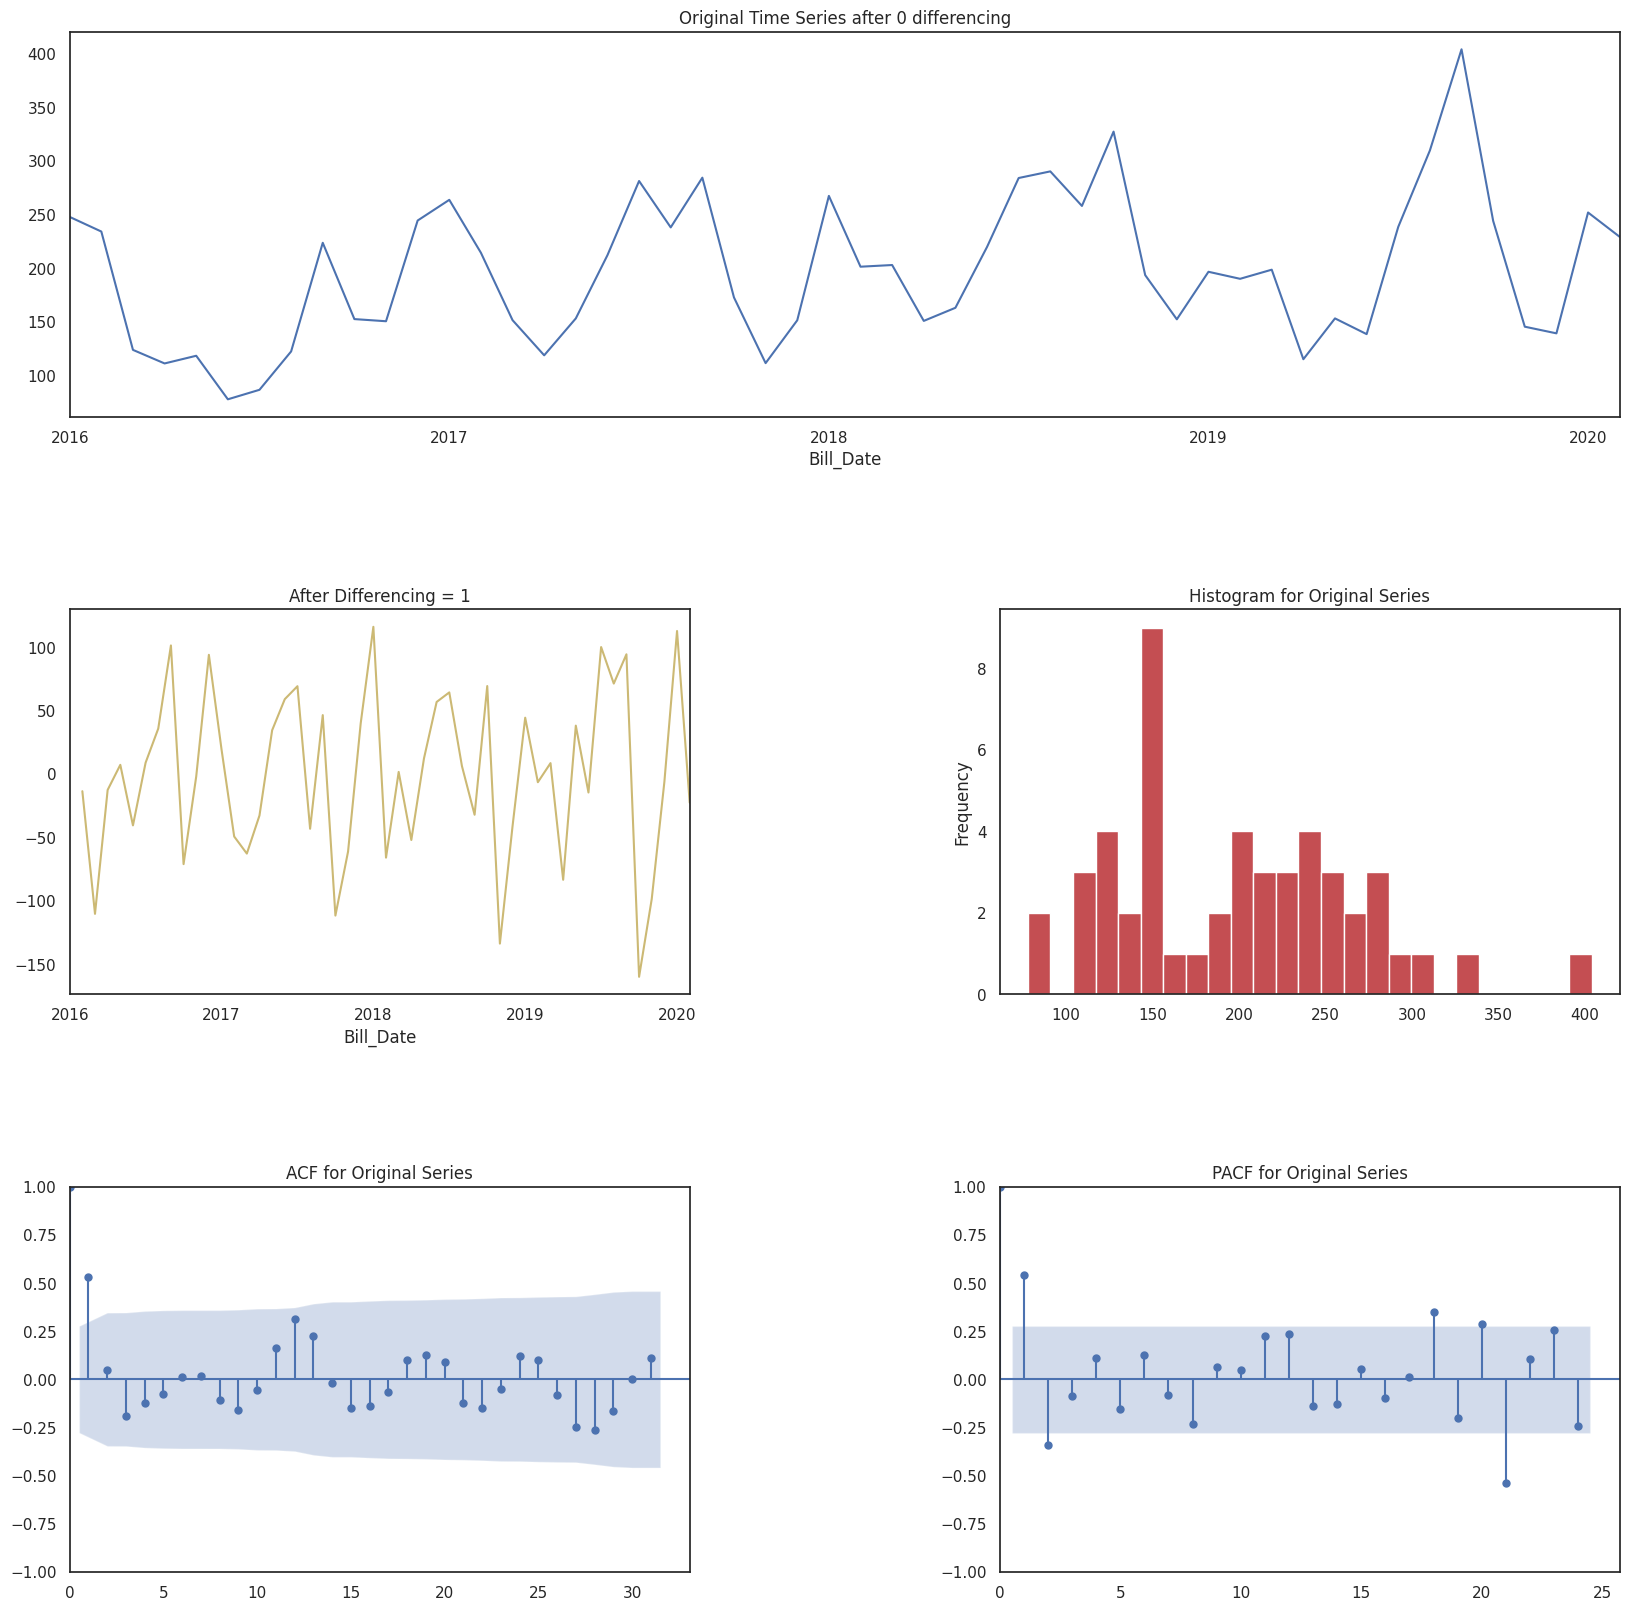

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'seasonal_PDQ': None}
    Fit-Predict data (shape=(50, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 20 Test Shape: 6


DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/ipvxkm92.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/_f2oaybp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43270', 'data', 'file=/tmp/tmpridduejr/ipvxkm92.json', 'init=/tmp/tmpridduejr/_f2oaybp.json', 'output', 'file=/tmp/tmpridduejr/prophet_modeloi4vooz0/prophet_model-20230601090837.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
09:08:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/u0u3cjtt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/3t71r84r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

    RMSE = 67.25
    Std Deviation of actuals = 61.31
    Normalized RMSE (as pct of std dev) = 110%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 26 Test Shape: 6


DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/h8lxpgq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/d6qojz55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26954', 'data', 'file=/tmp/tmpridduejr/h8lxpgq3.json', 'init=/tmp/tmpridduejr/d6qojz55.json', 'output', 'file=/tmp/tmpridduejr/prophet_model61p5g5e8/prophet_model-20230601090838.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
09:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 208.64
    Std Deviation of actuals = 53.72
    Normalized RMSE (as pct of std dev) = 388%
Cross Validation window: 2 completed

Fold Number: 3 --> Train Shape: 32 Test Shape: 6


09:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/msz68wde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/pw2zugif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94676', 'data', 'file=/tmp/tmpridduejr/msz68wde.json', 'init=/tmp/tmpridduejr/pw2zugif.json', 'output', 'file=/tmp/tmpridduejr/prophet_model9nurrcsq/prophet_model-20230601090838.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
09:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 172.15
    Std Deviation of actuals = 57.23
    Normalized RMSE (as pct of std dev) = 301%
Cross Validation window: 3 completed

Fold Number: 4 --> Train Shape: 38 Test Shape: 6


09:08:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/mevh1si8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/0udy45eh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59655', 'data', 'file=/tmp/tmpridduejr/mevh1si8.json', 'init=/tmp/tmpridduejr/0udy45eh.json', 'output', 'file=/tmp/tmpridduejr/prophet_modelzrbkf0zh/prophet_model-20230601090838.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
09:08:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 122.06
    Std Deviation of actuals = 66.23
    Normalized RMSE (as pct of std dev) = 184%
Cross Validation window: 4 completed

Fold Number: 5 --> Train Shape: 44 Test Shape: 6


09:08:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


    RMSE = 212.26
    Std Deviation of actuals = 87.66
    Normalized RMSE (as pct of std dev) = 242%
Cross Validation window: 5 completed


DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/sxj9cf5l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpridduejr/ls8aaodv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84072', 'data', 'file=/tmp/tmpridduejr/sxj9cf5l.json', 'init=/tmp/tmpridduejr/ls8aaodv.json', 'output', 'file=/tmp/tmpridduejr/prophet_modelef5pyrkh/prophet_model-20230601090839.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
09:08:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 133.57
    MSE (Mean Squared Error = 27528.43
    MAPE (Mean Absolute Percent Error) = 68%
    RMSE (Root Mean Squared Error) = 165.9169
    Normalized RMSE (MinMax) = 57%
    Normalized RMSE (as Std Dev of Actuals)= 239%
Time Taken = 2 seconds


09:08:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 20 Test Shape: 6

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=94.704, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=93.514, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=97.532, Time=0.02 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=91.537, Time=0.05 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=95.513, Time=0.56 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=93.054, Time=0.08 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=nan, Time=0.14 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=92.558, Time=0.12 sec
 ARIMA(1,0,2)(0,1,0)[12

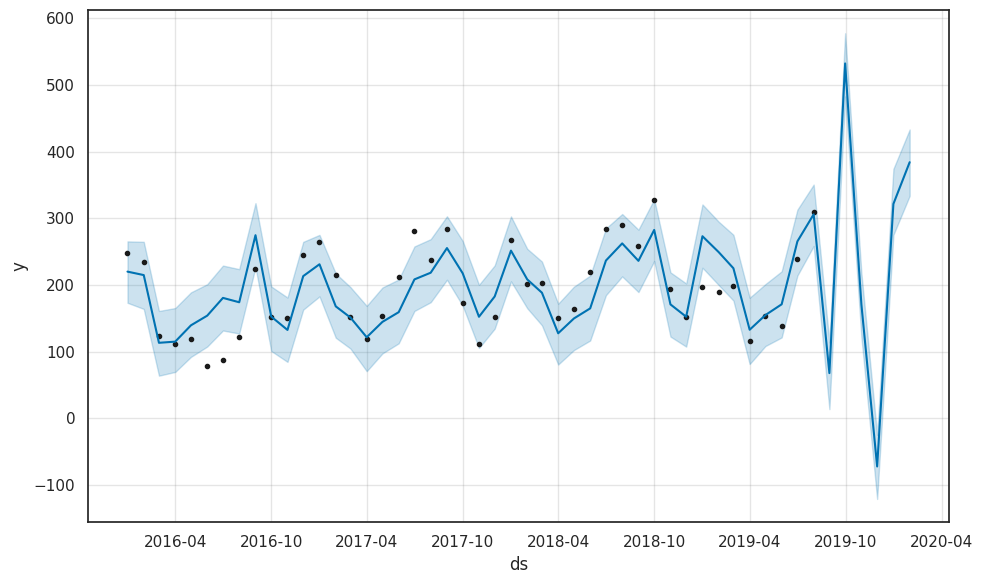

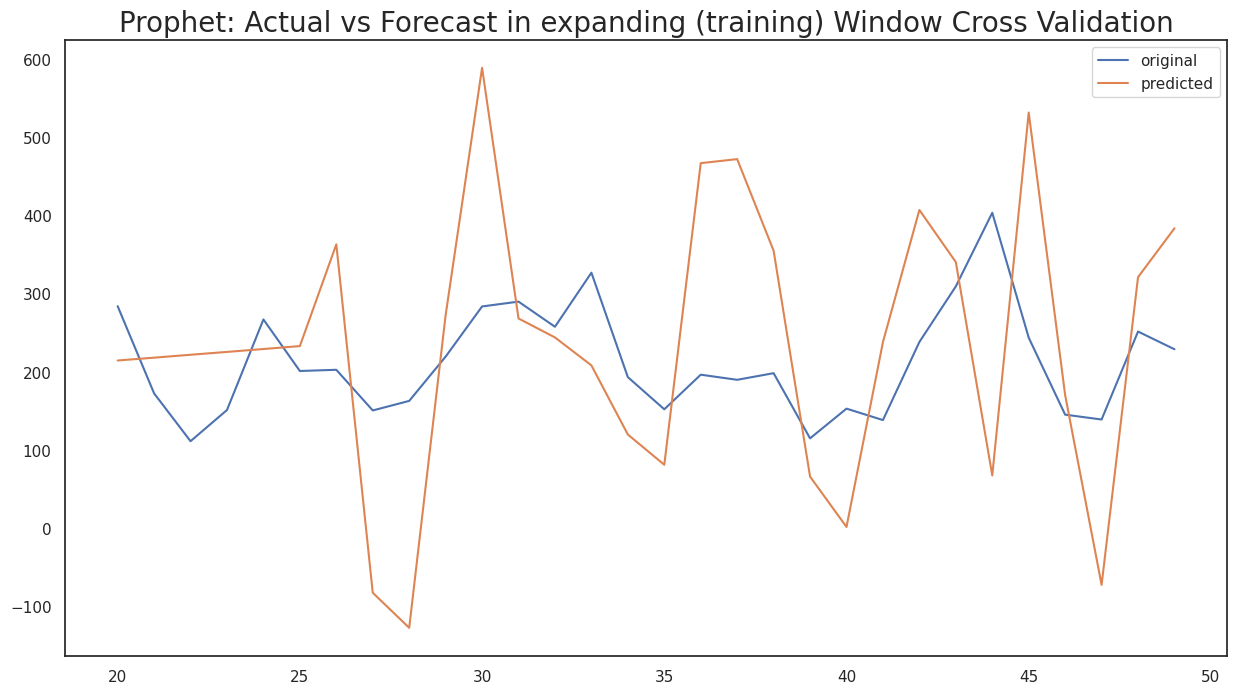

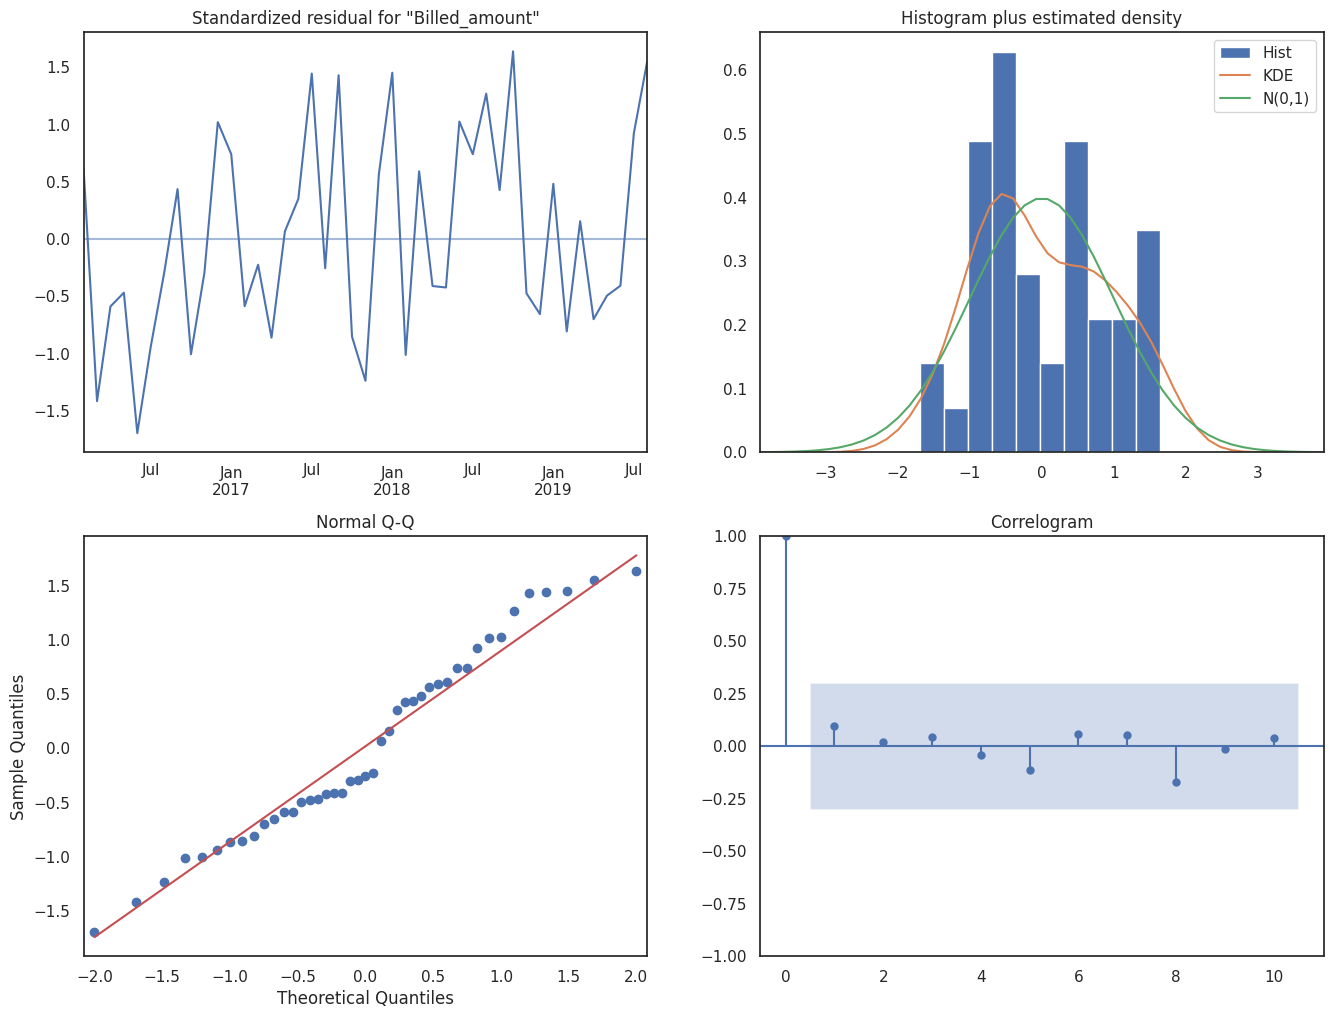

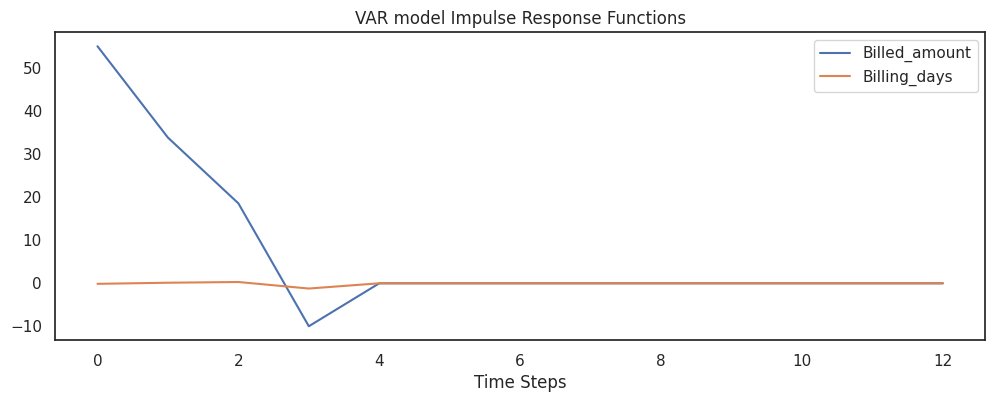

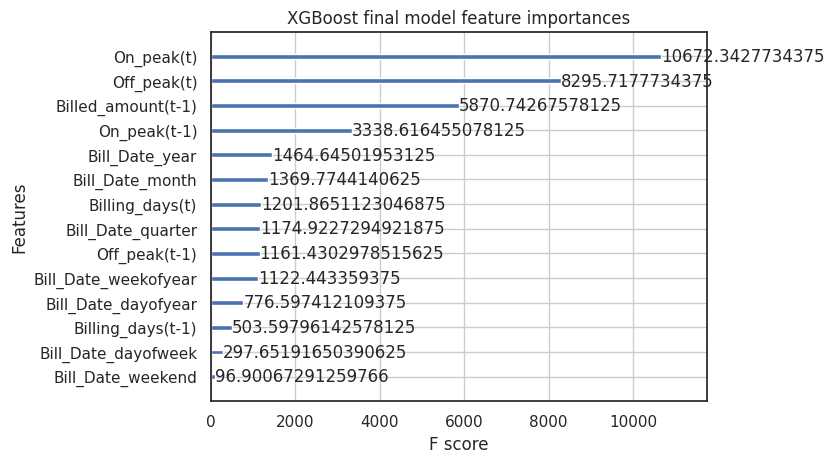

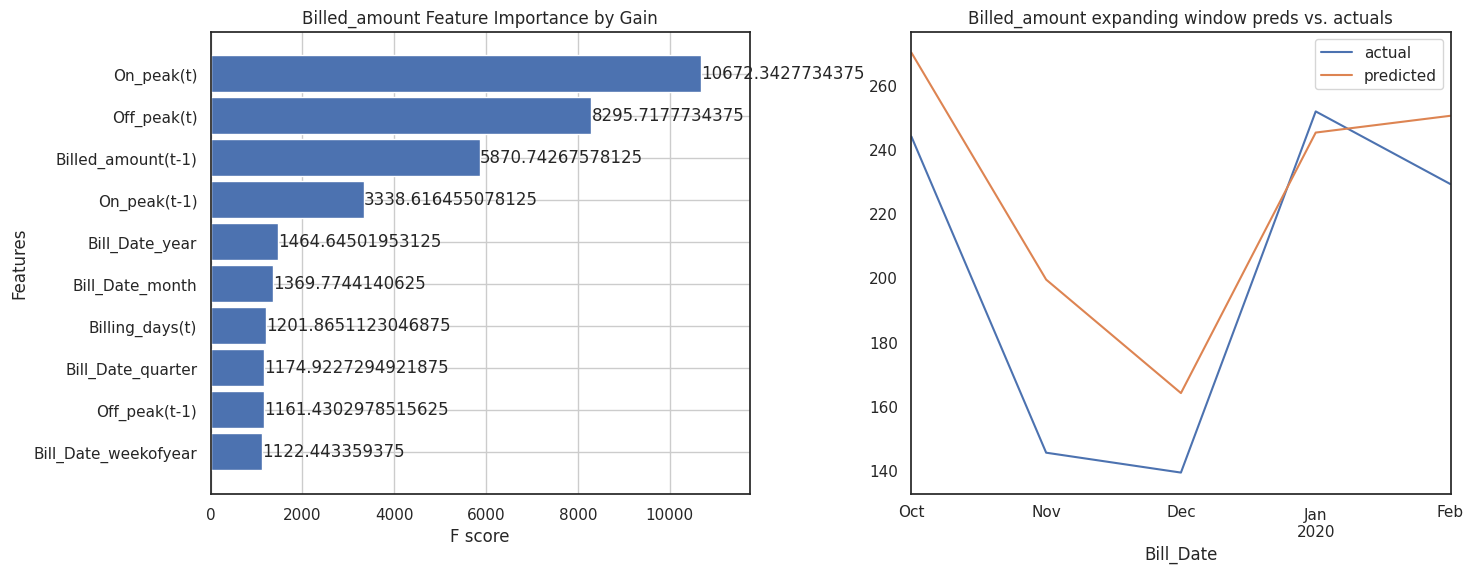

In [205]:
# Initialize the Auto Time Series model
ml_dict = AT.auto_timeseries(verbose=2, forecast_period=6, time_interval='M',
                             non_seasonal_pdq=None, seasonality=True, seasonal_period=12,
                             seasonal_PDQ=None, model_type='best')

# Fit the model using the provided training data
ml_dict.fit(train, ts_column, target)

